<a href="https://colab.research.google.com/github/OvetGarcia5/IAYRN_2024-008/blob/main/Actividades/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ovet Orlando Garcia Quiroz
# 1923949
# N4 008
# Actividad 8. Uso de software para busqueda
# RNP

1- Importar Librerias

In [1]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


Visualisacion de Set de Datos

In [2]:
keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

2- Importacion de Set de Datos

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Preparacion de clases

In [6]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco',
               'Seis', 'Siete', 'Ocho', 'Nueve']

Exploracion de imagenes de prueba

In [7]:
x_test.shape

(10000, 28, 28)

Exploracion de imagenes de entrenamiento

In [8]:
x_train.shape

(60000, 28, 28)

3- Procesamiento de Datos

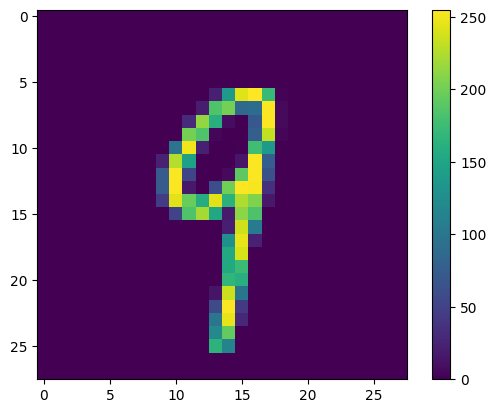

In [9]:
plt.figure()
plt.imshow(x_train[900])
plt.colorbar()
plt.grid(False)
plt.show()

Escalado de imagenes

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Visualizacion de las primeras 25 imagenes

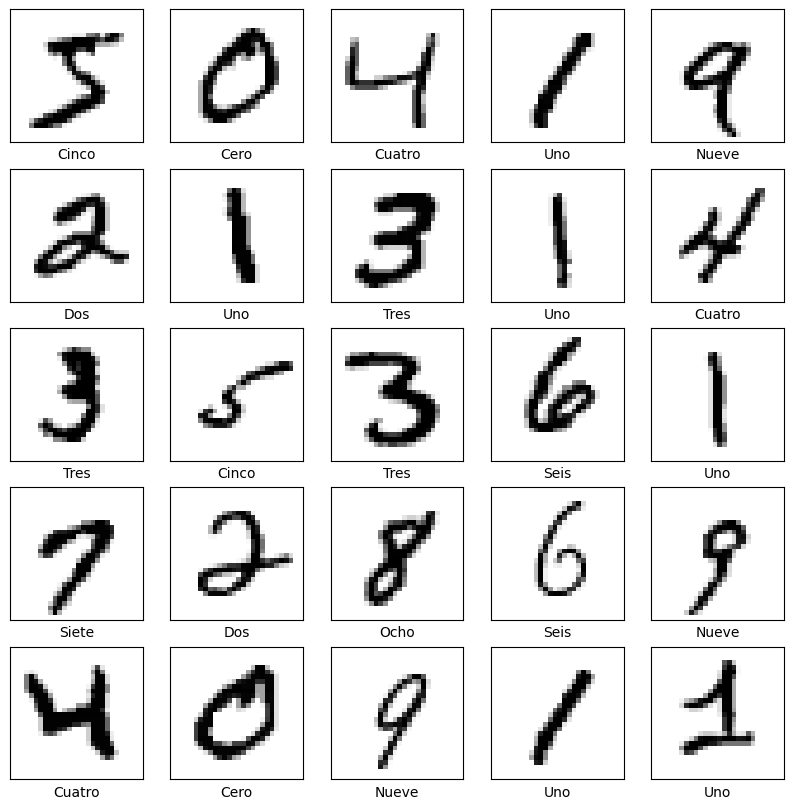

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = y_train[i]
    if 0 <= label_index < len(class_names):
        plt.xlabel(class_names[label_index])
    else:
        plt.xlabel(f"Unknown Label ({label_index})")
plt.show()

4- Seleccion y Entrenamiento del Modelo

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilacion del modelo de aprendizaje

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenamiento de la Red

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8692 - loss: 0.4488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9632 - loss: 0.1275
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9759 - loss: 0.0803
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0591
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0418
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9897 - loss: 0.0349
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0269
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9943 - loss: 0.0208
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9949 - loss: 0.0173
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0138


Evaluacion de la exactitud de nuestra Red

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9779 - loss: 0.0790

Test accuracy: 0.9779000282287598


Prueba del Modelo

In [16]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Resultados de la imagen 1200

In [17]:
predictions[1200]

array([1.6414508e-05, 2.9895536e-05, 1.1142838e-04, 1.3564222e-03,
       1.4362554e-07, 3.1990855e-06, 3.0826186e-06, 1.6226174e-06,
       9.9847573e-01, 2.0694617e-06], dtype=float32)

In [18]:
np.argmax(predictions[1200])

8

In [19]:
y_test[1200]

8

Funcion para vizualizacion de imagen de resultados

In [20]:
def plot_image(i, predictions_array, y_test, img):
  # Use y_test instead of true_label to access the true labels
  predictions_array, true_label, img = predictions_array, y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Resultados de la ultima imagen

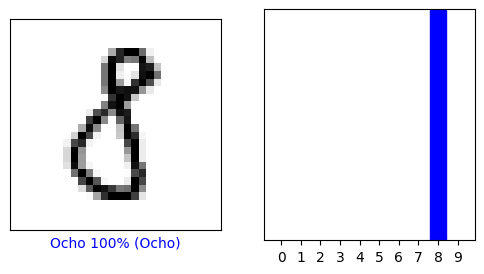

In [21]:
i = 1200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [22]:
predictions[-1]

array([7.19758021e-12, 2.14077498e-14, 1.44860877e-11, 1.27858227e-12,
       2.39807729e-09, 1.13128806e-13, 9.99999940e-01, 9.01632968e-19,
       4.06244570e-18, 5.57965219e-17], dtype=float32)

In [23]:
np.argmax(predictions[-1])

6

In [24]:
y_test[-1]

6

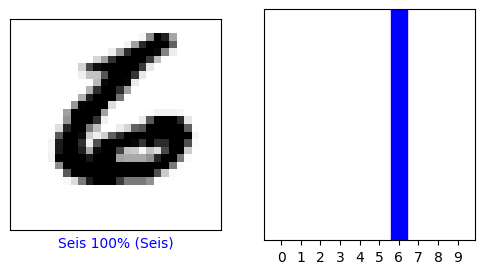

In [25]:
i = -1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Resultados de la primera imagen

In [26]:
predictions[1]

array([5.6893285e-10, 2.4566393e-06, 9.9999744e-01, 5.2856834e-08,
       6.0722176e-22, 4.4627693e-10, 6.2542160e-10, 2.7995646e-19,
       2.0225366e-08, 1.6063821e-16], dtype=float32)

In [27]:
np.argmax(predictions[1])

2

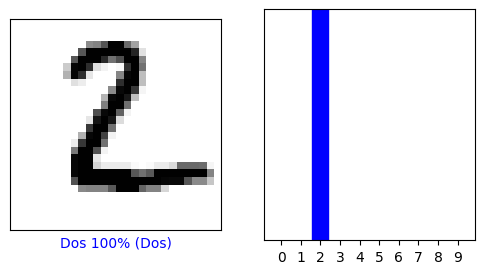

In [28]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [29]:
predictions[5000]

array([8.2937129e-14, 6.9622190e-11, 4.2604327e-08, 9.9999970e-01,
       1.6094903e-11, 8.3497005e-09, 5.5227392e-14, 9.0071556e-10,
       2.7551229e-07, 2.6786931e-10], dtype=float32)

In [30]:
np.argmax(predictions[5000])

3

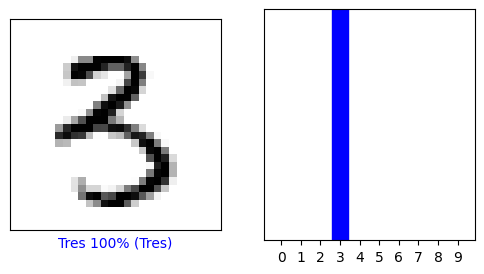

In [31]:
i = 5000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [32]:
predictions[3694]

array([1.1145957e-12, 5.6913450e-05, 9.9994308e-01, 1.5187623e-09,
       8.4043469e-17, 2.7407056e-11, 1.5351445e-13, 3.1690844e-11,
       8.4529922e-10, 3.4748501e-17], dtype=float32)

In [33]:
np.argmax(predictions[3694])

2

In [ ]:
y_test[3694]

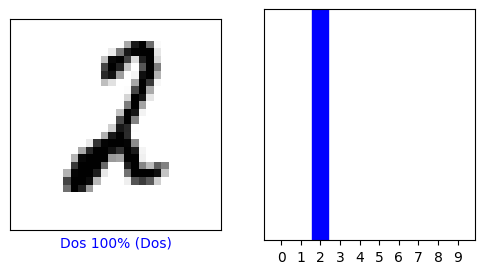

In [34]:
i = 3694
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()